<h1><center>Data Scientist Challenge - LATAM Airlines</center></h1>
<h2><center>María Ignacia Loyola Fraile</center></h2>

## Problema

###### Consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL).


## Enfoque del proyecto

Se debe mencionar que, el proyecto se analizó y desarrollo bajo las siguientes condiciones:

* Fue necesario agregar más columnas.
<br><br>
* Si bien se consideraron las dos fechas presentes en el dataset (Fecha-I (vuelo programado)  y Fecha-O (vuelo operado)) para el desarrollo del desafío, se dio más énfasis en la primera debido a que, se analizó el problema bajo la premisa de que la probabilidad que el evento ocurra (vuelo atrasado) comienza o más bien se determina en el instante en que se programo el vuelo. En otras palabras, se consideraron todos los factores en el cual el vuelo fue programado (dia, mes, período, destino, entre otros).El tiempo del vuelo operado, fue utilizado para calcular la cantidad de atraso de los vuelos programados en minutos.
<br>

* Se consideró como vuelo atrasado, solo sí, su minuto(s) de diferencia entre el tiempo de vuelo operado y el tiempo de vuelo programado es mayor a cero.  


In [1]:
# Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl

In [2]:
def listas_por_pantalla(lista):
    n = len(lista)
    for indice in range(n):
        print(str(indice+1) +'.- ' + lista[indice])
    print(' ')
    print('Total: ' + str(n))

In [3]:
def temporada_alta(data, fecha):
    
    
    lista = []
    indice_fecha = data.columns.get_loc(fecha)
    
    for indice in range(data.shape[0]):
        if ((data.iloc[indice, indice_fecha].month == 1) | (data.iloc[indice, indice_fecha].month == 2)):
            lista.append(1)
        elif ((data.iloc[indice, indice_fecha].month == 12) & (data.iloc[indice, indice_fecha].day >= 15)):
            lista.append(1)
        elif ((data.iloc[indice, indice_fecha].month == 3) & (data.iloc[indice, indice_fecha].day <= 3)):
            lista.append(1)
            
        elif ((data.iloc[indice, indice_fecha].month == 7) & (data.iloc[indice, indice_fecha].day >= 15 )):
            lista.append(1)
        
        elif ((data.iloc[indice, indice_fecha].month == 9) & (data.iloc[indice, indice_fecha].day >= 11)):
            lista.append(1)
        
        else:
            lista.append(0)
    return lista

In [4]:
def periodo_dia(data, col):
    
    periodos = []
    indice_col = data.columns.get_loc(col)
    
    for indice in range(data.shape[0]):
        
        if ((data.iloc[indice, indice_col].hour >= 5) & (data.iloc[indice, indice_col].hour < 12)):
            periodos.append('mañana')
        
        elif ((data.iloc[indice, indice_col].hour >= 12) & (data.iloc[indice, indice_col].hour < 19)):
            periodos.append('tarde')
        else:
            periodos.append('noche')
    return periodos
        
        

In [5]:
def dif_min(data, dife_hrs, dife_min):
    
    indice_hrs = data.columns.get_loc(dife_hrs)
    indice_min = data.columns.get_loc(dife_min)
    minutos = []
    retrasos = []
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_hrs] < 0):
            minutos.append((60-data.iloc[indice, indice_min])*(-1))
            retrasos.append('No')
            
        elif(data.iloc[indice, indice_hrs] == 0):
            minutos.append(data.iloc[indice, indice_min])
            retrasos.append('Sí')
            
        else:
            minutos.append(((data.iloc[indice, indice_hrs])*60) + data.iloc[indice, indice_min])
            retrasos.append('Sí')
    data['dif_min'] = minutos
    #data['Retraso(SI/NO)'] = retrasos
    
    
    

In [6]:
def minutos_totales(data, fecha_I, fecha_O):
    
    data['TimeDelta'] = data[fecha_O] - data[fecha_I]
    minutos = []
    horas = []
    for indice in range(data.shape[0]):
        horas.append(data.iloc[indice,-1].total_seconds()//3600)
        minutos.append((data.iloc[indice,-1].total_seconds()%3600)//60)
        
    data['dif_hrs'] = horas
    data['dif_minn'] = minutos
    
    dif_min(data, 'dif_hrs','dif_minn')
    
    
    
    

In [7]:
def atraso_15(data, dif_min):
    
    indice_dif_min = data.columns.get_loc(dif_min)
    retraso_15 = []
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_dif_min] > 15):
            retraso_15.append(1)
            
        else:
            retraso_15.append(0)
            
    return retraso_15

In [8]:
def dif_I_O(data, col, cols):
    
    indice_col = data.columns.get_loc(col)
    indice_cols = data.columns.get_loc(cols)
    cont = 0
    aux = []
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_col] != data.iloc[indice, indice_cols]):
            cont += 1
            aux.append('Sí')
        else:
            aux.append('No')
            
    if(cont != 0):
        data[col + '/' + cols] = aux
        
    else:
        return None

In [9]:
#Dejar solo una
def Meses(data, col):
    
    col_indice = data.columns.get_loc(col)
    mes = []
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, col_indice] == 1):
            mes.append('Enero')
            
        elif(data.iloc[indice, col_indice] == 2):
            mes.append('Febrero')
            
        elif(data.iloc[indice, col_indice] == 3):
            mes.append('Marzo')
            
        elif(data.iloc[indice, col_indice] == 4):
            mes.append('Abril')
            
        elif(data.iloc[indice, col_indice] == 5):
            mes.append('Mayo')
            
        elif(data.iloc[indice, col_indice] == 6):
            mes.append('Junio')
            
        elif(data.iloc[indice, col_indice] == 7):
            mes.append('Julio')
            
        elif(data.iloc[indice, col_indice] == 8):
            mes.append('Agosto')
            
        elif(data.iloc[indice, col_indice] == 9):
            mes.append('Septiembre')
            
        elif(data.iloc[indice, col_indice] == 10):
            mes.append('Octubre')
            
        elif(data.iloc[indice, col_indice] == 11):
            mes.append('Noviembre')
            
        else:
            mes.append('Diciembre')
    return mes
        
    
    
            
            
            
            
    
    
    

In [11]:
#revisar si la ocupo
def Frecuencias(data, col):
    
    acumulado = 0
    frecuencia = []
    indice_col = data.columns.get_loc(col)
    
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_col] > 0):
            acumulado += 1
            frecuencia.append(acumulado)
        else:
            frecuencia.append(0)
    return frecuencia
            

In [12]:
#Revisar si la ocupo
def cols_extras(data, col, col2, col3, col4):
    
    col = data[col].tolist()
    col2 = data[col2].tolist()
    col3 = data[col3].tolist()
    col4 = data[col4].tolist()
    return col, col2, col3, col4
        
        
    
    

In [13]:
def proporcion(data, col):
    
    indice_col = data.columns.get_loc(col)
    frec = 0
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_col] > 0):
            frec+=1
        
    return (frec/data.shape[0])

In [14]:
def frecuencia_atraso(data, col, destino, dif_min):
    
    indice_col = data.columns.get_loc(col)
    indice_dif_min = data.columns.get_loc(dif_min)
    cont = 0
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_col] == destino) & (data.iloc[indice, indice_dif_min] > 0):
            
            cont+=1
            
    return cont
            
            

In [56]:
def dia_semana(data, col):
    
    indice_col = data.columns.get_loc(col)
    dias = []
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_col] == 'Monday'):
            dias.append('Lunes')
        elif(data.iloc[indice, indice_col] == 'Tuesday'):
            dias.append('Martes')
            
        elif(data.iloc[indice, indice_col] == 'Wednesday'):
            dias.append('Miércoles')
            
        elif(data.iloc[indice, indice_col] == 'Thursday'):
            dias.append('Jueves')
            
        elif(data.iloc[indice, indice_col] == 'Friday'):
            dias.append('Viernes')
            
        elif(data.iloc[indice, indice_col] == 'Saturday'):
            dias.append('Sábado')
            
        else:
            dias.append('Domingo')
    return dias
        
        

In [16]:
def cantidad(data, col, variable):
    
    indice_col = data.columns.get_loc(col)
    cont = 0
    
    for indice in range(data.shape[0]):
        if(data.iloc[indice, indice_col] == variable):
            cont+=1
            
    return cont

In [17]:
def tasa_ocurrencia(data, col, destino, dif_min):
    
    indice_col = data.columns.get_loc(col)
    indice_dif_min = data.columns.get_loc(dif_min)
    
    cont = 0
    
    for indice in range(data.shape[0]):
        if(data.iloc[indice, indice_col] == destino):
            cont+=1
    aux = frecuencia_atraso(data, col, destino, dif_min)
    return aux/cont

In [31]:
def calculo_tasas(data, lista, col):
    
    valores = []
    atrasos = []
    cantidad_total = []
    
    for indice in range(len(lista)):
        valores.append(tasa_ocurrencia(data, col, lista[indice], 'dif_min'))
        atrasos.append(frecuencia_atraso(data, col, lista[indice],'dif_min'))
        cantidad_total.append(cantidad(data, col, lista[indice]))
        
    return valores, atrasos, cantidad_total

# Sección Uno: Análisis y exploración 

In [15]:
#Carga del dataset

df = pd.read_csv('C:/Users/Ignacia/Desktop/Ignacia/Postulaciones/LATAM/dataset_SCL.csv', low_memory=False)

In [16]:
df.head(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [29]:
print('---------------------------------INFORMACIÓN GENERAL----------------------------------------')
print('')
print('Cantidad de vuelos registrados: ' + str(df.shape[0]))
print('')
print('Cantidad de variables presentes en el dataset: ' + str(df.shape[1]))
print('')
print(listas_por_pantalla(df.columns))
print('Cantidad de valores nulos presentes en el dataset: \n' + str(df.isna().sum()))
print('Resumen:\n')
print(df.describe())
print('--------------------------------------------------------------------------------------------')


---------------------------------INFORMACIÓN GENERAL----------------------------------------

Cantidad de vuelos registrados: 68205

Cantidad de variables presentes en el dataset: 18

1.- Fecha-I
2.- Vlo-I
3.- Ori-I
4.- Des-I
5.- Emp-I
6.- Fecha-O
7.- Vlo-O
8.- Ori-O
9.- Des-O
10.- Emp-O
11.- DIA
12.- MES
13.- AÑO
14.- DIANOM
15.- TIPOVUELO
16.- OPERA
17.- SIGLAORI
18.- SIGLADES
 
Total: 18
None
Cantidad de valores nulos presentes en el dataset: 
Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        0
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64
Resumen:

                DIA           MES           AÑO
count  68205.000000  68205.000000  68205.000000
mean      15.714742      6.622667   2017.000029
std        8.782941      3.523281      0.005415
min        1.000000      1.000000   2017.000000
25%        8.000

In [18]:
# Eliminamos la fila con el valor nulo (se permite solo por ser una única fila con valor Nan)
df = df.dropna()

In [20]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object')

In [34]:
print('---------------------------------INFORMACIÓN ESPECÍFICA----------------------------------------')
print('')
print('Cantidad de ciudades de destino programadas: ' + str(listas_por_pantalla(df['Des-I'].unique())))
print('')
print('Cantidad de ciudades de destino operadas: ' + str(listas_por_pantalla(df['Des-O'].unique())))
print('')
print('La fecha y hora inicial vuelo programada del dataset es: ' + df['Fecha-I'].min())
print('')
print('La fecha y hora final vuelo programada del dataset es: ' + df['Fecha-I'].max())
print('')
print('La fecha y hora inicial vuelo operado del dataset es: ' + df['Fecha-O'].min())
print('')
print('La fecha y hora final vuelo operado del dataset es: ' + df['Fecha-O'].max())
print('')
print('--------------------------------------------------------------------------------------------')


---------------------------------INFORMACIÓN ESPECÍFICA----------------------------------------

1.- KMIA
2.- KDFW
3.- SAEZ
4.- CYYZ
5.- LFPG
6.- MMMX
7.- SABE
8.- SKBO
9.- LIRF
10.- EGLL
11.- MPTO
12.- KATL
13.- SBGR
14.- SBGL
15.- SBFL
16.- LEMD
17.- SPJC
18.- YSSY
19.- KIAH
20.- SGAS
21.- SBFI
22.- SCTE
23.- SCCI
24.- SCNT
25.- SCBA
26.- SCVD
27.- SCQP
28.- SCIE
29.- SCSE
30.- SCAT
31.- SCCF
32.- SCFA
33.- SCDA
34.- SCAR
35.- SAME
36.- SACO
37.- SUMU
38.- SCPQ
39.- SCJO
40.- KMCO
41.- KJFK
42.- SEGU
43.- MMUN
44.- MDPC
45.- KLAX
46.- NZAA
47.- SCIP
48.- SLLP
49.- SLVR
50.- SBCT
51.- SEQM
52.- SAZS
53.- SAAR
54.- SANT
55.- YMML
56.- SEQU
57.- SANU
58.- SAZN
59.- SPSO
60.- SAWH
61.- EGYP
62.- SULS
63.- SLCB
64.- SARI
 
Total: 64
Cantidad de ciudades de destino programadas: None

1.- KMIA
2.- KDFW
3.- SAEZ
4.- CYYZ
5.- LFPG
6.- MMMX
7.- SABE
8.- SKBO
9.- LIRF
10.- EGLL
11.- MPTO
12.- KATL
13.- SBGR
14.- SBGL
15.- SBFL
16.- LEMD
17.- SPJC
18.- YSSY
19.- KIAH
20.- SGAS
21.- SBFI
22.- SCT

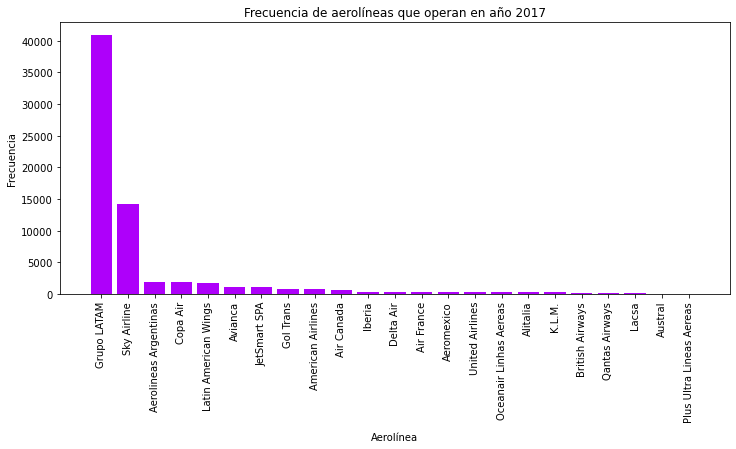

,OPERA,frequency,percentage,cumulative_perc
0,Grupo LATAM,40892,0.599545,0.599545
1,Sky Airline,14298,0.209633,0.809178
2,Aerolineas Argentinas,1949,0.028576,0.837754
3,Copa Air,1850,0.027124,0.864878
4,Latin American Wings,1673,0.024529,0.889407
5,Avianca,1152,0.016890,0.906297
6,JetSmart SPA,1095,0.016055,0.922352
7,Gol Trans,806,0.011817,0.934169
8,American Airlines,757,0.011099,0.945268
9,Air Canada,565,0.008284,0.953552


In [309]:
# Cantidad de vuelos registrados según mes
opera = freq_tbl(df['OPERA'])
plt.figure(figsize=(12,5))
plt.bar(opera['OPERA'],opera['frequency'], color = '#ae00fa')
plt.xticks(rotation = 90)
plt.xlabel('Aerolínea', labelpad=10)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de aerolíneas que operan en año 2017')
plt.show()
opera

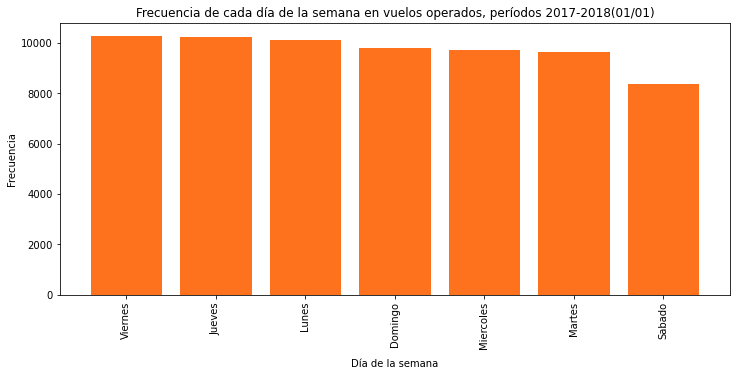

,DIANOM,frequency,percentage,cumulative_perc
0,Viernes,10292,0.150898,0.150898
1,Jueves,10250,0.150282,0.301180
2,Lunes,10131,0.148537,0.449718
3,Domingo,9796,0.143626,0.593344
4,Miercoles,9722,0.142541,0.735884
5,Martes,9662,0.141661,0.877546
6,Sabado,8352,0.122454,1.000000


In [38]:
dia_O = freq_tbl(df['DIANOM'])
plt.figure(figsize=(12,5))
plt.bar(dia_O['DIANOM'],dia_O['frequency'], color = '#ff721d')
plt.xticks(rotation = 90)
plt.xlabel('Día de la semana', labelpad=10)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cada día de la semana en vuelos operados, períodos 2017-2018(01/01)')
plt.show()
dia_O

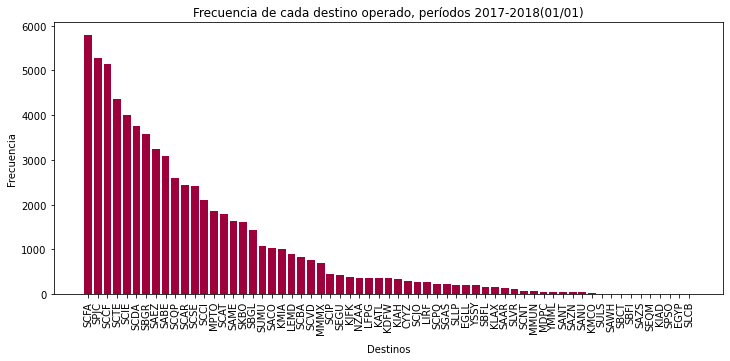

,Des-O,frequency,percentage,cumulative_perc
0,SCFA,5786,0.084832,0.084832
1,SPJC,5269,0.077252,0.162085
2,SCCF,5146,0.075449,0.237534
3,SCTE,4357,0.063881,0.301415
4,SCIE,3993,0.058544,0.359959
...,...,...,...,...
58,SEQM,2,0.000029,0.999941
59,KIAD,1,0.000015,0.999956
60,SPSO,1,0.000015,0.999971
61,EGYP,1,0.000015,0.999985


In [40]:
destinos_O = freq_tbl(df['Des-O'])
plt.figure(figsize=(12,5))
plt.bar(destinos_O['Des-O'],destinos_O['frequency'], color = '#9d003b')
plt.xticks(rotation = 90)
plt.xlabel('Destinos', labelpad=10)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cada destino operado, períodos 2017-2018(01/01)')
plt.show()
destinos_O

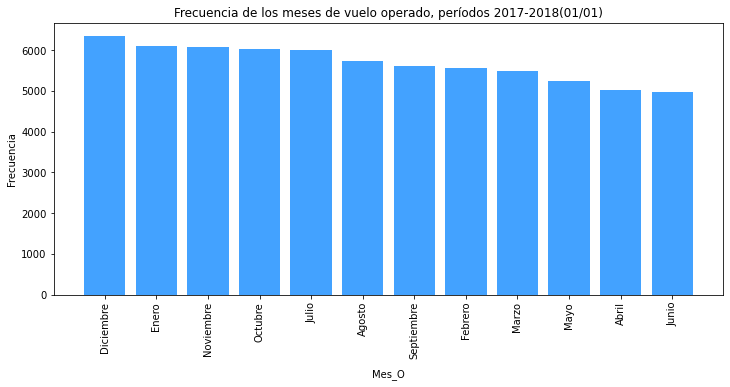

,Mes_O,frequency,percentage,cumulative_perc
0,Diciembre,6356,0.093190,0.093190
1,Enero,6107,0.089539,0.182729
2,Noviembre,6080,0.089143,0.271872
3,Octubre,6032,0.088439,0.360311
4,Julio,5992,0.087853,0.448164
5,Agosto,5744,0.084217,0.532380
6,Septiembre,5610,0.082252,0.614632
7,Febrero,5561,0.081534,0.696166
8,Marzo,5482,0.080375,0.776541
9,Mayo,5240,0.076827,0.853369


In [41]:
# Para efectos de visualización, se reescriben los valores de la columna MES
df['Mes_O'] = Meses(df,'MES')
df = df.drop(['MES'], axis = 1)
meses_O = freq_tbl(df['Mes_O'])
plt.figure(figsize=(12,5))
plt.bar(meses_O['Mes_O'],meses_O['frequency'], color = '#43a2ff')
plt.xticks(rotation = 90)
plt.xlabel('Mes_O', labelpad=10)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los meses de vuelo operado, períodos 2017-2018(01/01)')
plt.show()
meses_O


#### Para poder continuar con el análisis exploratorio, se procede a agregar nuevas columnas


<h3><u> Desafío pregunta 2 (Respuesta) </u></h3>

2.- Genera las columnas adicionales expórtelas en un archivo synthetic_features.csv:
* temporada_alta: 1 si Fecha-I está entre 15-Dic y 3 Mar, o 15-Jul y 31-Jul o 11-Sep y 30-Sep, 0 si no.
* dif_min: diferencia en minutosentre Fecha-O y Fecha-I
* atraso_15: 1 si dif_min > 15, si no.
* periodo_dia: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I

In [23]:
# Como el dataset anterior tuvo manipulación de datos, volvemos a cargar el dataset
data = pd.read_csv('C:/Users/Ignacia/Desktop/Ignacia/Postulaciones/LATAM/dataset_SCL.csv',low_memory=False)

In [24]:
data['Fecha-I'] = pd.to_datetime(data['Fecha-I']) 
data['Fecha-O'] = pd.to_datetime(data['Fecha-O'])
data = data.sort_values(by = 'Fecha-I') # Ordenamos el dataset en base al tiempo de los vuelos programados
data['Año_I'] = data['Fecha-I'].dt.year #Se crea una columna con el año de los vuelos programados                                
data['Mes_I'] = data['Fecha-I'].dt.month #Se crea una columna con los meses de los vuelos programados                             
data['Dia_IName'] = data['Fecha-I'].dt.day_name()  #Se crea una columna con los días de los vuelos programados
data['Hora_IName'] = data['Fecha-I'].dt.time  #Se crea una columna con las horas y minutos de los vuelos programados


data['temporada_alta'] = temporada_alta(data, 'Fecha-I') # Columna booleana que, indica si el vuelo se programo en temporada alta o no. 

data['periodo_dia'] = periodo_dia(data,'Fecha-I') # Columna categórica que, indica el período para el cual se programo el vuelo. 

minutos_totales(data,'Fecha-I','Fecha-O') # Columna de tipo cuantitativa que, indica la diferencia en minutos entre el tiempo de vuelo opera y el tiempo de vuelo programado.

data = data.drop(['TimeDelta','dif_hrs', 'dif_minn'],axis = 1) # Se eliminan las columnas creadas de forma auxiliar

data['atraso_15'] = atraso_15(data, 'dif_min') # Columna booleana que, indica si el vuelo programado tuvo un atrasado mayor al de 15 minutos.

In [25]:
# Exportamos el dataset en formato archivo separado por comas, dentro de una ruta por default del sistema.
data.to_csv('synthetic_features.csv') 

### Observación:

Dicho anteriormente, el análisis de datos junto con el desarrollo del modelo predictivo se enfocó principalmente en el tiempo de los vuelos programados. Es por ello que, como ya se realizó el calculo de diferencia de minutos entre los tiempos correspondientes (Fecha-O - Fecha-I), el tiempo en el cual los vuelos fueron operados ya no fueron considerados. 

Adicionalmente se debe mencionar que, los minutos que tienen un valor negativo indican que dicho vuelo despego o aterrizó antes del tiempo programado. 

<h3><u> Desafío pregunta 3 (Respuesta) </u></h3>

¿ Cómo se compone la tasa por destino ?

La tasa de riesgo por destino programado está compuesta por:
<br>
<br>
$ Tasa \ por \ destino = \frac{Número\ de \ vuelos \ atrasados (mismo \ destino) }{Vuelos\ Totales \ (mismo \ destino) } \times potencia \ de \ 10$

In [32]:
destinos = data['Des-I'].unique().tolist()
valores, atrasos, cantidad_total = calculo_tasas(data, destinos,'Des-I')
DestinoI_2017 = pd.DataFrame({
    'Destino':destinos,
    'N Vuelos':cantidad_total,
    'N Vuelos atrasados':atrasos,
    'Tasa':valores
})

In [33]:
DestinoI_2017

,Destino,N Vuelos,N Vuelos atrasados,Tasa
0,MMMX,700,316,0.451429
1,SKBO,1604,1046,0.652120
2,MPTO,1850,685,0.370270
3,SBGL,1434,1118,0.779637
4,SPJC,5270,3688,0.699810
...,...,...,...,...
59,EGYP,1,1,1.000000
60,SAWH,6,6,1.000000
61,SLCB,1,1,1.000000
62,SULS,6,3,0.500000


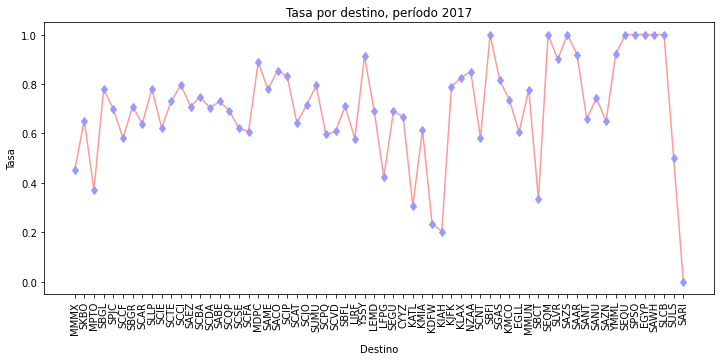

In [34]:
plt.figure(figsize=(12,5))
plt.plot(DestinoI_2017['Destino'],DestinoI_2017['Tasa'],marker='d',linestyle='-', c = '#ff9999',markeredgecolor='#9999ff',markerfacecolor='#9999ff')
plt.xticks(rotation = 90)
plt.xlabel('Destino', labelpad=10)
plt.ylabel('Tasa')
plt.title('Tasa por destino, período 2017')
plt.show()

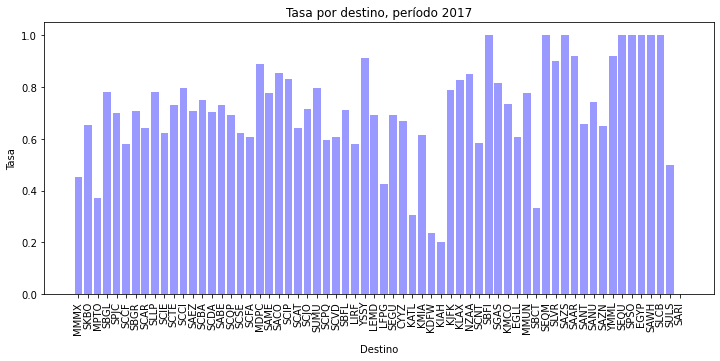

In [42]:
plt.figure(figsize=(12,5))
plt.bar(DestinoI_2017['Destino'],DestinoI_2017['Tasa'], color = '#9999ff')
plt.xticks(rotation = 90)
plt.xlabel('Destino', labelpad=10)
plt.ylabel('Tasa')
plt.title('Tasa por destino, período 2017')
plt.show()

Para entender de mejor manera los resultados obtenidos, se expone un ejemplo:
* Durante el período de un año (2017) se programaron en total 700 vuelos con destino a Ciudad de México MMMX, en donde 316 presentaron atrasos durante ese mismo período, el riesgo que existe dentro de los vuelos con destino programado a Ciudad de México es del 45,14% 



¿ Cómo se compone la tasa de atraso por aerolínea ?

La tasa de riesgo por aerolínea programado está compuesta por:
<br>
<br>
$ Tasa \ por \ aerolínea = \frac{Número\ de \ vuelos \ atrasados (misma \ aerolínea) }{Vuelos\ Totales \ (misma \ aerolínea) } \times potencia \ de \ 10$

In [39]:
aerolineas_2017 = data['Emp-I'].unique().tolist()
valores, atrasos, cantidad_total = calculo_tasas(data, aerolineas_2017,'Emp-I')
aerolineas = pd.DataFrame({
    'Aerolínea':aerolineas_2017,
    'N Vuelos':cantidad_total,
    'N Vuelos atrasados':atrasos,
    'Tasa':valores
})

In [40]:
aerolineas

,Aerolínea,N Vuelos,N Vuelos atrasados,Tasa
0,AMX,351,78,0.222222
1,LAN,37611,27542,0.732286
2,CMP,1850,685,0.370270
3,AVA,1152,660,0.572917
4,GLO,806,471,0.584367
5,SKU,14298,8430,0.589593
6,TAM,3049,2400,0.787143
7,ARG,1949,1152,0.591072
8,LAW,1574,1174,0.745870
9,AZA,259,150,0.579151


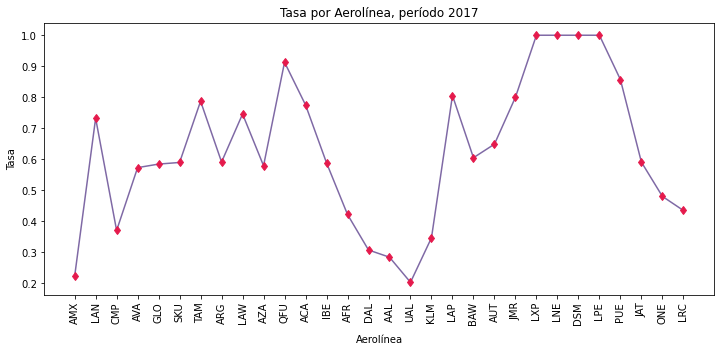

In [41]:
plt.figure(figsize=(12,5))
plt.plot(aerolineas['Aerolínea'],aerolineas['Tasa'],marker='d',linestyle='-', c = '#7f69a5',markeredgecolor='#e51a4c',markerfacecolor='#e51a4c')
plt.xticks(rotation = 90)
plt.xlabel('Aerolínea', labelpad=10)
plt.ylabel('Tasa')
plt.title('Tasa por Aerolínea, período 2017')
plt.show()

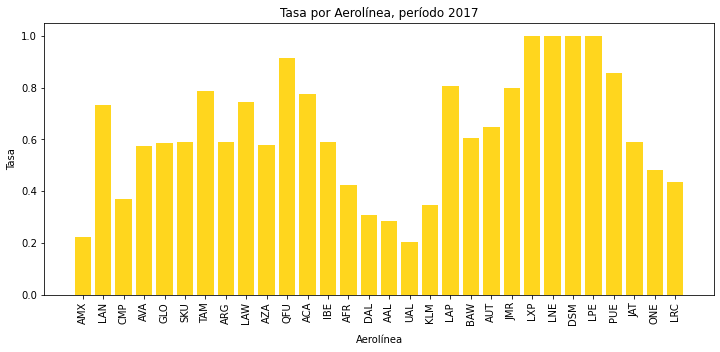

In [44]:
plt.figure(figsize=(12,5))
plt.bar(aerolineas['Aerolínea'],aerolineas['Tasa'], color = '#ffd61e')
plt.xticks(rotation = 90)
plt.xlabel('Aerolínea', labelpad=10)
plt.ylabel('Tasa')
plt.title('Tasa por Aerolínea, período 2017')
plt.show()

Para entender de mejor manera los resultados obtenidos, se expone un ejemplo:
* Durante el período de un año (2017) se programaron en total 37611 vuelos con la aerolína LAN, en donde 27542 presentaron atrasos durante ese mismo período, el riesgo que existe dentro de los vuelos programados con la aerolínea LAN es del 73,22% 

¿ Cómo se compone la tasa de atraso por mes del año ?

La tasa de riesgo por mes del año programado está compuesta por:
<br>
<br>
$ Tasa \ por \ mes = \frac{Número\ de \ vuelos \ atrasados \ en \ un \ mes }{Vuelos\ Totales \ (mismo \ mes) } \times potencia \ de \ 10$

In [47]:
data['MES_I'] = Meses(data,'Mes_I')
data = data.drop(['Mes_I'],axis = 1)
meses_2017 = data['MES_I'].unique().tolist()
valores, atrasos, cantidad_total = calculo_tasas(data, meses_2017,'MES_I')
mes_tasa = pd.DataFrame({
    'Mes':meses_2017,
    'N Vuelos':cantidad_total,
    'N Vuelos atrasados':atrasos,
    'Tasa':valores
})

In [48]:
mes_tasa

,Mes,N Vuelos,N Vuelos atrasados,Tasa
0,Enero,6108,4042,0.661755
1,Febrero,5561,3628,0.652401
2,Marzo,5480,3099,0.565511
3,Abril,5021,2975,0.592511
4,Mayo,5239,3359,0.641153
5,Junio,4982,3231,0.648535
6,Julio,5991,4613,0.769988
7,Agosto,5744,3717,0.647110
8,Septiembre,5610,3621,0.645455
9,Octubre,6032,4300,0.712865


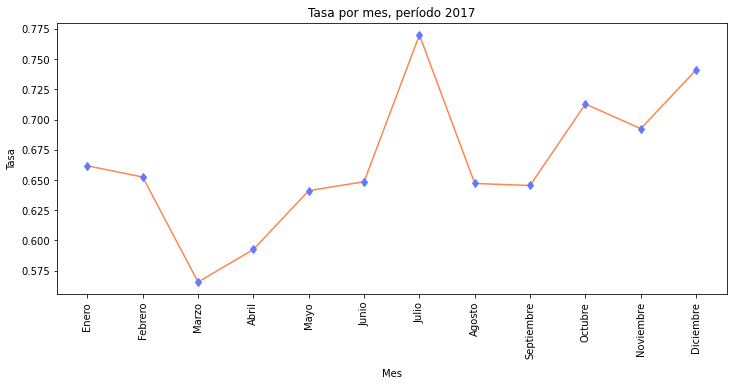

In [51]:
plt.figure(figsize=(12,5))
plt.plot(mes_tasa['Mes'],mes_tasa['Tasa'],marker='d',linestyle='-', c = '#ff8650',markeredgecolor='#6378ff',markerfacecolor= '#6378ff')
plt.xticks(rotation = 90)
plt.xlabel('Mes', labelpad=10)
plt.ylabel('Tasa')
plt.title('Tasa por mes, período 2017')
plt.show()

Para entender de mejor manera los resultados obtenidos, se expone un ejemplo:
* Durante el período de un año (2017) se programaron en el mes de Julio 5991 vuelos, en donde 4613 presentaron atrasos durante ese mismo período, el riesgo que existe dentro de los vuelos programados para el mes de Julio es del 76,99% 


¿ Cómo se compone la tasa de atraso por día de la semana ?

La tasa de riesgo por día de la semana de vuelo programado está compuesta por:
<br>
<br>
$ Tasa \ por \ día \ de \ semana = \frac{Número\ de \ vuelos \ atrasados \ en \ un \ día \ determinado }{Vuelos\ Totales \ (mismo \ día \ determinado) } \times potencia \ de \ 10$

In [57]:
data['Dia_Inombre'] = dia_semana(data,'Dia_IName')
data = data.drop(['Dia_IName'],axis = 1)
dias_semanas_2017 = data['Dia_Inombre'].unique().tolist()
valores, atrasos, cantidad_total = calculo_tasas(data, dias_semanas_2017,'Dia_Inombre')
dia_tasa = pd.DataFrame({
    'Día':dias_semanas_2017,
    'N Vuelos':cantidad_total,
    'N Vuelos atrasados':atrasos,
    'Tasa':valores
})

In [58]:
dia_tasa

,Día,N Vuelos,N Vuelos atrasados,Tasa
0,Domingo,9833,6299,0.640598
1,Lunes,10098,6808,0.674193
2,Martes,9666,6210,0.642458
3,Miércoles,9726,6419,0.659984
4,Jueves,10245,7001,0.683358
5,Viernes,10332,7421,0.718254
6,Sábado,8306,5349,0.643992


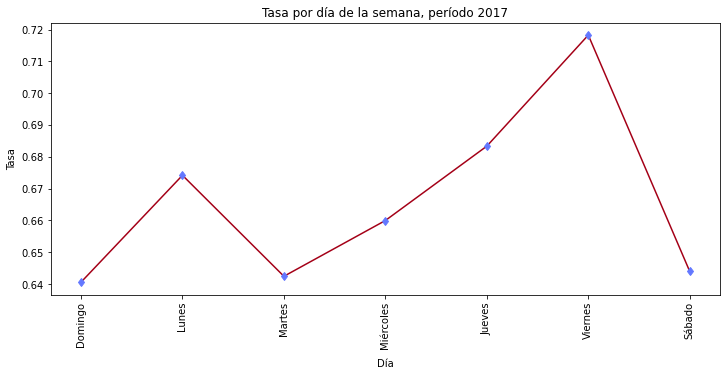

In [62]:
plt.figure(figsize=(12,5))
plt.plot(dia_tasa['Día'],dia_tasa['Tasa'],marker='d',linestyle='-', c = '#a40017',markeredgecolor='#6378ff',markerfacecolor= '#6378ff')
plt.xticks(rotation = 90)
plt.xlabel('Día', labelpad=10)
plt.ylabel('Tasa')
plt.title('Tasa por día de la semana, período 2017')
plt.show()

Para entender de mejor manera los resultados obtenidos, se expone un ejemplo:
* Durante el período de un año (2017) se programaron en el día de Viernes 10332 vuelos, en donde 7421 presentaron atrasos durante ese mismo período, el riesgo que existe dentro de los vuelos programados para un día Viernes es del 71,82%. 

¿ Cómo se compone la tasa de atraso por temporada ?

La tasa de riesgo por día de la semana de vuelo programado está compuesta por:
<br>
<br>
$ Tasa \ por \ temporada = \frac{Número\ de \ vuelos \ atrasados \ en \ una \ determinada \ temporada }{Vuelos\ Totales \ (misma \ temporada \ determinada) } \times potencia \ de \ 10$

In [64]:
temporada_2017 = data['temporada_alta'].unique().tolist()
valores, atrasos, cantidad_total = calculo_tasas(data, temporada_2017,'temporada_alta')
temporada_tasa = pd.DataFrame({
    'temporada':temporada_2017,
    'N Vuelos':cantidad_total,
    'N Vuelos atrasados':atrasos,
    'Tasa':valores
})

In [65]:
temporada_tasa

,temporada,N Vuelos,N Vuelos atrasados,Tasa
0,1,22762,15558,0.683508
1,0,45444,29949,0.659031


Para entender de mejor manera los resultados obtenidos, se expone un ejemplo:
* Durante el período de un año (2017) se programaron en temporada alta 22762 vuelos, en donde 15558 presentaron atrasos durante ese mismo período, el riesgo que existe dentro de los vuelos programados en temporada alta es del 68,35%. 

¿ Cómo se compone la tasa de atraso por tipo de vuelo ?

La tasa de riesgo por tipo de vuelo  (Nacional/Internacional) programado está compuesta por:
<br>
<br>
$ Tasa \ por \ tipo \ de \ vuelo = \frac{Número\ de \ vuelos \ atrasados \ en \ un \ tipo \ de \ vuelo \ determinado }{Vuelos\ Totales \ (mismo \ tipo \ de \ vuelo \ determinado) } \times potencia \ de \ 10$

In [70]:
tipovuelo_2017 = data['TIPOVUELO'].unique().tolist()
valores, atrasos, cantidad_total = calculo_tasas(data, tipovuelo_2017,'TIPOVUELO')
tipovuelo_tasa = pd.DataFrame({
    'Tipo de Vuelo':tipovuelo_2017,
    'N Vuelos':cantidad_total,
    'N Vuelos atrasados':atrasos,
    'Tasa':valores
})

In [71]:
tipovuelo_tasa

,Tipo de Vuelo,N Vuelos,N Vuelos atrasados,Tasa
0,I,31240,21197,0.678521
1,N,36966,24310,0.657631


Para entender de mejor manera los resultados obtenidos, se expone un ejemplo:
* Durante el período de un año (2017) se programaron 31240 vuelos Internacionales, en donde 21197 presentaron atrasos durante ese mismo período, el riesgo que existe dentro de los vuelos programados internacionales es del 67,85%. 

¿ Qué variables esperarías que más influyeran en predecir atrasos ?

* En base a los resultados obtenidos previamente se puede establecer que, las variables más influyentes dentro de un modelo predectivo pueden ser:
        * El destino programado del vuelo
        * La aerolínea programada para el vuelo
        * El mes para el cual se programó el vuelo
        * El día de la semana en el cual se programó el vuelo 
        
* Respecto a las variables tipo de vuelo y temporada, pueden que tengan menor influencia debido a que, estas presentan un riesgo bastante similar entre sus propias categórias. Por ejemplo, un vuelo que puede ser de tipo Nacional o Internacional posee casi el mismo porcentaje de riesgo de atraso. Para un vuelo programado con viaje internacional posee 68% de riesgo aproximadamente, y un vuelo programado con viaje nacional un 66% de riesgo de atraso aproximadamente. 

<h3><u> Desafío pregunta 1 (Respuesta) </u></h3>
<br>
¿ Cómo se distribuyen los datos ? ¿ Qué te llama la atención o cuáñ es tu conclusión sobre esto ?

# Fin de la sección uno

# Sección 2: Modelo predictivo

